 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt                             #CHAT GPT
from matplotlib.dates import MonthLocator, DateFormatter    #CHAT GPT
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_csv_path = Path("/Users/montygash/Desktop/FinTechWork/python-homework/Starter_Code 2/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_df.index



/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/2396303863.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11',
               '2015-03-12', '2015-03-13',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [4]:
# Count nulls
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [5]:
# Drop nulls
whale_df = whale_df.dropna().copy()
# CHECK
whale_df.isnull().mean()


SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_csv_path = Path("/Users/montygash/Desktop/FinTechWork/python-homework/Starter_Code 2/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
print(algo_df.head())
print(algo_df.tail())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
              Algo 1    Algo 2
Date                          
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358


/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/1480595070.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


In [7]:
# Count nulls
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [8]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().mean()

print(algo_df.head())
print(algo_df.tail())

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
              Algo 1    Algo 2
Date                          
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("/Users/montygash/Desktop/FinTechWork/python-homework/Starter_Code 2/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_df = sp500_df.sort_values("Date")
sp500_df

/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/3624801270.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/3624801270.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [10]:
# Check Data Types
print(whale_df.dtypes)
print("_____")
print(algo_df.dtypes)
print("_____")
print(sp500_df.dtypes)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object
_____
Algo 1    float64
Algo 2    float64
dtype: object
_____
Close    object
dtype: object


In [11]:
# Fix Data Types

# REMOVE '$'
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")

# MAKE 'Close' a float type variable
sp500_df["Close"] = sp500_df["Close"].astype("float64")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_pct_change_df = sp500_df.pct_change()
sp500_pct_change_df.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_pct_change_df = sp500_pct_change_df.dropna().copy()
sp500_pct_change_df.isnull().mean() * 100

Close    0.0
dtype: float64

In [14]:
# Rename `Close` Column to be specific to this portfolio.

sp500_pct_change_df = sp500_pct_change_df.rename(columns={"Close": "SP500 Daily % Return"})
print(sp500_pct_change_df.head())
print(sp500_pct_change_df.tail())

            SP500 Daily % Return
Date                            
2012-10-02              0.000872
2012-10-03              0.003624
2012-10-04              0.007174
2012-10-05             -0.000322
2012-10-08             -0.003457
            SP500 Daily % Return
Date                            
2019-04-16              0.000509
2019-04-17             -0.002274
2019-04-18              0.001579
2019-04-22              0.001012
2019-04-23              0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_pct_change_df], axis=1, join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily % Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

[<Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>,
 <Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>,
 <Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>,
 <Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>,
 <Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>,
 <Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>,
 <Axes: title={'center': 'SP500 Daily % Return'}, xlabel='Date'>]

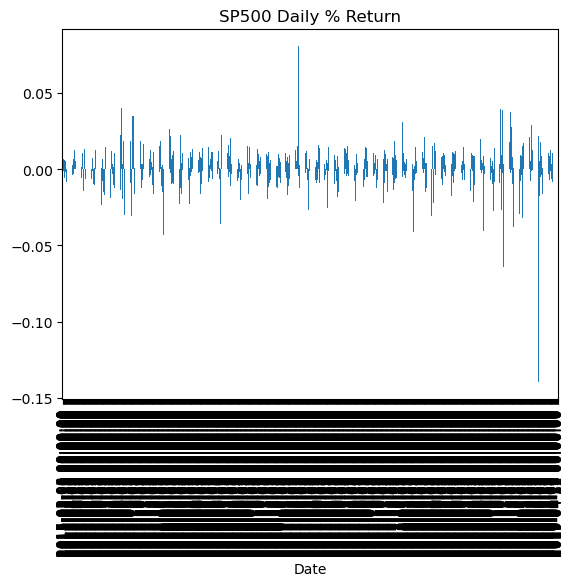

In [16]:
# Plot daily returns of all portfolios
#whale_df = whale_df.groupby([whale_df.index.year, whale_df.index.month, whale_df.index.day])
#company = ''
#for company in combined_df():  HOW TO ITERATE TO MAKE THIS CLEANER... THE PLOTING EACH GRAPH... AND, DO I JUST PLOT THEM ON TOP OF EACH OTHER?
#FROM GPT:
        #import matplotlib.pyplot as plt

# Assuming you have a list of column names you want to plot
#columns_to_plot = ['BERKSHIRE HATHAWAY INC', 'Soros Fund Management LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC']

# Create a bar plot for each column
#for column in columns_to_plot:
 #   plt.figure()  # Create a new figure for each plot
  #  combined_df[column].plot(kind='bar')
   # plt.title(column)  # Set the title to the column name

# Show all the plots together
#plt.show()

returns_plot_list = []  # i want to save the plots into a list so that I can easily access them later


for column in combined_df:
    new_plot = combined_df[column].plot(kind='bar', title=column)
    returns_plot_list.append(new_plot)

returns_plot_list



#berk_plot = combined_df['BERKSHIRE HATHAWAY INC'].plot(kind='bar')
#soros_plot = combined_df['BERKSHIRE HATHAWAY INC'].plot(kind='bar')
#paulson_plot = combined_df['PAULSON & CO.INC. '].plot(kind='bar')
#tiger_plot = combined_df['TIGER GLOBAL MANAGEMENT LLC'].plot(kind='bar')
#berk_plot = whale_df['BERKSHIRE HATHAWAY INC'].plot(kind='bar', figsize=(20,20))
#berk_plot.xaxis.set_major_locator(MonthLocator())                   #CHAT GPT
#berk_plot.xaxis.set_major_formatter(DateFormatter("%b %Y"))         #CHAT GPT

#algo1_plot = combined_df['Algo 1'].plot(kind='bar')

#algo2_plot = combined_df['Algo 2'].plot(kind='bar')
#algo_plot = algo_df['Algo 1'].plot(kind='bar', figsize=(20,20))
#algo_plot.xaxis.set_major_locator(MonthLocator())                   #CHAT GPT
#algo_plot.xaxis.set_major_formatter(DateFormatter("%b %Y"))         #CHAT GPT

#sp500_plot = combined_df['SP500 Daily % Return'].plot(kind='bar')
#sp500_plot = sp500_pct_change_df['SP500 Daily % Return'].plot(kind='bar,', figsize=(20,20));



#### Calculate and Plot cumulative returns.

Date
2015-03-03    0.995461
2015-03-04    0.991093
2015-03-05    0.992278
2015-03-06    0.978214
2015-03-09    0.982072
                ...   
2019-04-16    1.372945
2019-04-17    1.369823
2019-04-18    1.371986
2019-04-22    1.373375
2019-04-23    1.385517
Name: SP500 Daily % Return, Length: 1043, dtype: float64
Date
2015-03-03    0.993431
2015-03-04    0.997617
2015-03-05    1.004327
2015-03-06    0.991172
2015-03-09    0.989534
                ...   
2019-04-16    1.526861
2019-04-17    1.531781
2019-04-18    1.534716
2019-04-22    1.533046
2019-04-23    1.553401
Name: BERKSHIRE HATHAWAY INC, Length: 1043, dtype: float64


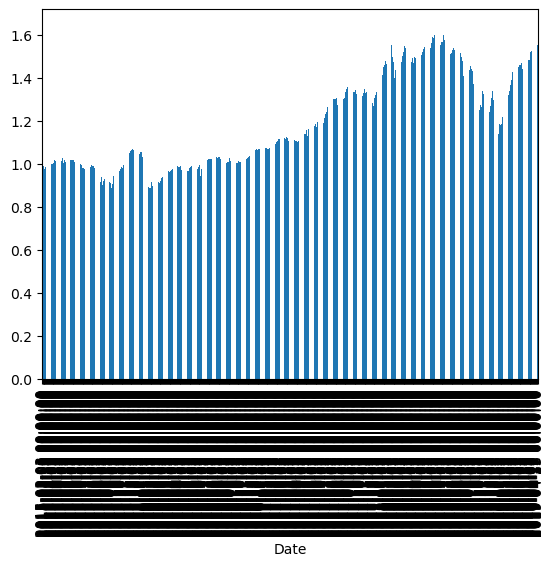

In [17]:
# Calculate cumulative returns of all portfolios

#cumulative_returns = (1 + daily_returns).cumprod()

sp500_cuml_returns = (1 + combined_df['SP500 Daily % Return']).cumprod()


berk_cuml_returns = (1 + combined_df['BERKSHIRE HATHAWAY INC']).cumprod()

print(sp500_cuml_returns)
print(berk_cuml_returns)
# Plot cumulative returns

sp500_cuml_plot = sp500_cuml_returns.plot(kind='bar')
ber_cuml_plot = berk_cuml_returns.plot(kind='bar')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


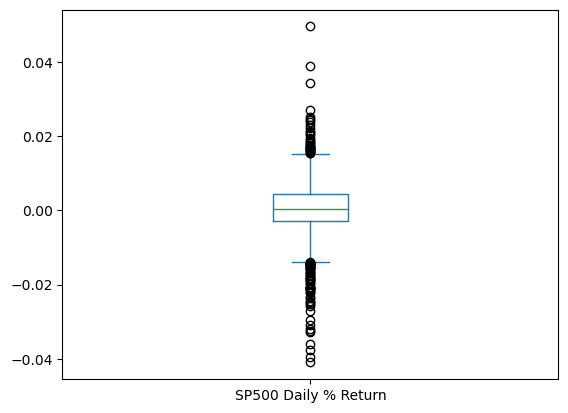

In [48]:
# Box plot to visually show risk


# I AM GETTING AN ERROR WHEN I RUN BOTH OF THEM???
sp500_box_plot = combined_df['SP500 Daily % Return'].plot(kind='box')

#berk_box_plot = combined_df['BERKSHIRE HATHAWAY INC'].plot(kind='box')


### Calculate Standard Deviations

In [67]:
# Calculate the daily standard deviations of all portfolios
all_returns_sd = combined_df.std()
all_returns_sd

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily % Return           0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [51]:
# Calculate  the daily standard deviation of S&P 500

#WHAT DO YOU MEAN BY DAILY STD?

#combined_df['SP500 Daily % Return'].std()


# Determine which portfolios are riskier than the S&P 500


0.008553731597758204

### Calculate the Annualized Standard Deviation

In [68]:
# Calculate the annualized standard deviation (252 trading days)
#combined_df['SP500 Daily % Return'].rolling(window=252).std()
all_std_annual = all_returns_sd * np.sqrt(252)
all_std_annual


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily % Return           0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

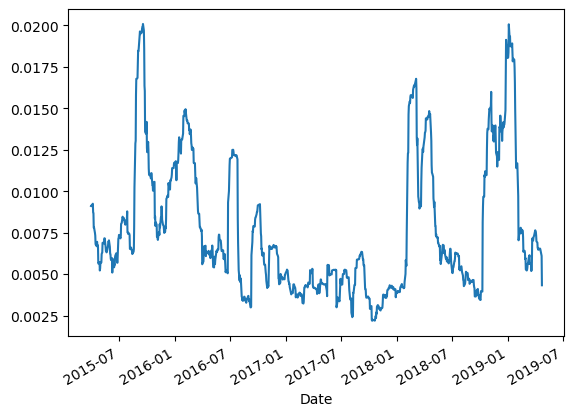

In [55]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_std = combined_df['SP500 Daily % Return'].rolling(window=21).std()

#sp500_rolling_std = sp500_returns_sd.rolling(window=21)
    # ^^ DOESN'T WORK BECAUSE WE ARE TRYING TO USE 'rolling' ON A FLOAT. 


# Plot the rolling standard deviation
sp500_rolling_std.plot()

### Calculate and plot the correlation

<Axes: >

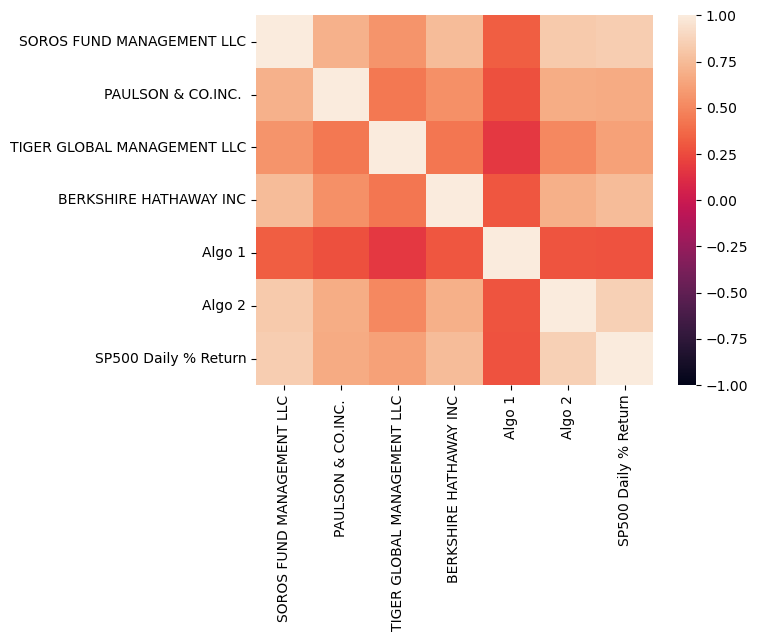

In [69]:
# Calculate the correlation
all_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [64]:
# Calculate covariance of a single portfolio

## COVARIANCE OF A SINGLE PORTFOLIO WITH WHAT ELSE? HOW MUCH IT COVARIES WITH ALL OTHER PORTFOLIOS IN GENERAL?
berk_var = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['BERKSHIRE HATHAWAY INC'])

# Calculate variance of S&P 500
sp500_var = combined_df['SP500 Daily % Return'].var()


# Computing beta
#amzn_beta = covariance / variance_mkt

berk_beta = (berk_var / sp500_var)

# Plot beta trend




AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios




In [27]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [71]:
# Initial imports
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi




In [72]:
# Load .env environment variables
load_dotenv()

True

In [73]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [74]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [75]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [77]:
# Format current date as ISO format
end = pd.Timestamp("2023-10-12", tz="America/New_York").isoformat()
start = pd.Timestamp("2022-10-12", tz="America/New_York").isoformat()

In [82]:
# Set the tickers
tickers = ["OM", "HRMY", "PMVP", "SAVA", "SLAB"]

In [83]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [84]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2022-10-12 04:00:00+00:00,46.64,48.190,46.435,8916,47.80,354276,47.242157,HRMY
2022-10-13 04:00:00+00:00,47.63,47.835,43.960,7181,45.69,538904,47.092565,HRMY
2022-10-14 04:00:00+00:00,51.07,51.670,47.540,17814,49.58,999595,50.423185,HRMY
2022-10-17 04:00:00+00:00,49.46,52.515,49.090,11507,51.69,495121,50.026639,HRMY
2022-10-18 04:00:00+00:00,51.21,51.890,49.815,9501,50.14,433888,51.056973,HRMY
...,...,...,...,...,...,...,...,...
2023-10-06 04:00:00+00:00,115.12,115.800,112.040,6348,112.78,222851,114.945410,SLAB
2023-10-09 04:00:00+00:00,114.26,115.150,112.895,6619,113.75,203272,114.282031,SLAB
2023-10-10 04:00:00+00:00,116.66,117.480,114.320,5410,114.81,165045,116.639072,SLAB


In [28]:
# Reading data from 1st stock
"OM- Outset Medical "



In [29]:
# Reading data from 2nd stock
"HRMY- HARMONY BIOSCIENCES"

In [30]:
# Reading data from 3rd stock
'PMVP- PMV PHARMA'

In [ ]:
'SAVA - CASSAVA SCIENCES'

In [ ]:
'SLAB - SILICON LABORATORIES'

In [31]:
# Combine all stocks in a single DataFrame








In [32]:
# Reset Date index


In [33]:
# Reorganize portfolio data by having a column per symbol


In [34]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return

# Higher Volalitity Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.8, 0.2]                                           
portfolio_returns = all_returns.dot(weights)                   # all of the stock percent changes times how much of each stock we have... weight
cumulative_returns = (1 + portfolio_returns).cumprod()          #reinvesting proceeds and adding one dollar
(initial_investment * cumulative_returns).plot()                # how our initial investment grows over time

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [39]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [41]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios


In [43]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [ ]:
#Amazing, all short stocks at the perfect time, having hindsight on my side... I couldn't lose!!